# Сборный Проект - 1

### Шаг 1. Общая информация о данных

In [1]:
#качаем библиотеки
import pandas as pd
import numpy as np
import random
import seaborn as sns
import math
from math import factorial
from math import ceil
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import norm
import math as mt
random.seed(42)

In [2]:
df=pd.read_csv("C:\\Python 3_8\\CSV\dataset_project_4.csv",index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [4]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Шаг 2. Предобработка данных 

### 2.1 Замена типа данных

In [5]:
#Приведем к нижнему регистру название столбцов
new_names=df.columns.str.lower()
df.set_axis(new_names,axis = 'columns', inplace = True)

In [6]:
#округлим и переведем дату в int
df['year_of_release']=df['year_of_release'].round().astype('Int64')

In [7]:
#так как critic_score  является 100-бальной целочисленной системой , переведем столбец к целочисленному типу 
df['critic_score']=df['critic_score'].round().astype('Int64')

In [8]:
#значение "tbd" в  означает в ожидании или должно быть сделано. По факту это пропуск. 
#Поэтому меняем "tbd" на NaN,  в дальнейшем к данному типу применим те же алгоритмы замены, что и к другим пропускам.
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [9]:
#Т.к. user-score - количественный критерий  переведем тип данныз к  float
df['user_score']=df['user_score'].astype('float')

In [10]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.3+ MB


In [12]:
#Проверим наличие дубликатов
df.duplicated().sum()

0

### 2.2 Замена пропусков

### 2.2.1 Замена пропусков в названии игр 

In [13]:
#пропуск в название игр 
df[df['name'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [14]:
#нам совершенно не важно как называется игра, придумаем названия сами. 

In [15]:
df.loc[659,'name']='Unnamed1'
df.loc[14244,'name']='Unnamed2'

### 2.2.2 Замена пропуска в дате релиза

Если игра вышла на нескольких платформах, и на каких-то платформах  не указана дата, выхода то можно заменить пропуск медианной датой.
Проведем замену  и оценим качество такого решения.

In [16]:
#сгруппируем данные по игре, посчитаем количество релизов, первый, последний  и мединанный год релиза 
data_release = df.groupby('name').agg({'year_of_release':('count', 'min','max', 'median')})
#для наглядности переименуем столбцы
data_release.columns=['count_release','first_year','last_year','median']
#добавим столбец период релизов игры в годах, для этого вычтем из последнего года  первый год релиза. 
data_release['period_release']=data_release['last_year']-data_release['first_year']

In [17]:
data_release.head(3)

,count_release,first_year,last_year,median,period_release
name,,,,,
Beyblade Burst,1,2016.0,2016.0,2016.0,0.0
Fire Emblem Fates,1,2015.0,2015.0,2015.0,0.0
Frozen: Olaf's Quest,2,2013.0,2013.0,2013.0,0.0


(0.0, 4.0)

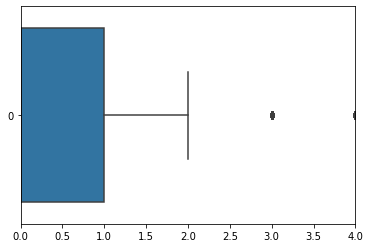

In [18]:
#Оценим качество такой замены, для этого посмотрим как срединные даты распределены по датасету.
#для этого возьмем выборку игр с количеством релизов 2 и более
release_out=data_release.query('count_release>1')
sns.boxplot(data=release_out['period_release'], orient='h')    
plt.xlim(0,4)

По распределению видно, что 50 % игр выходят в один год на всех платформах. Еще около 50%  выходят в период 2 года. Медиана находится около нуля.
В нормальное распределение попадает  сроки до 2 лет. 

Есть уникальные игры , которые перезапускаются многие годы, но их единицы. 

In [19]:
#создадим словарь . который присвоит каждой игре медианную дату выхода
dict_years=df.groupby('name')['year_of_release'].median().round().to_dict()

In [20]:
#напишем функцию, которая меняет пропуск на медианную дату
df['year_of_release']=df['year_of_release'].fillna(-1)#заменим пропуски на -1
def filler(row):
    if row['year_of_release']==-1:
          return  dict_years[row['name']]
    return row['year_of_release']
df['year_of_release'] = df.apply(filler, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.8+ MB


### 2.2.3 Замена пропусков в рейтингах

### 2.2.3.1 Замена пропусков в данных рейтинга ESRB

Проанализируем связь жанра игры с рейтингом ESRB. Возможно какие то жанры имеют уникальный  рейтинг например "для взрослых"

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«K-A» - «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

In [22]:
#сведем таблицу по жанрам и значениям рейтинга
rating_esrb = df.pivot_table(index = ['genre'], columns ='rating', values ='name', aggfunc ='count')
#заменим пропуски нулями
rating_esrb.fillna(0)

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,416.0,481.0,1.0,0.0,608.0,0.0,681.0
Adventure,0.0,162.0,68.0,2.0,0.0,99.0,0.0,115.0
Fighting,0.0,8.0,19.0,0.0,0.0,49.0,0.0,362.0
Misc,0.0,457.0,167.0,5.0,1.0,13.0,0.0,239.0
Platform,0.0,358.0,144.0,0.0,0.0,3.0,0.0,64.0
Puzzle,0.0,289.0,43.0,0.0,0.0,0.0,0.0,10.0
Racing,0.0,585.0,96.0,0.0,0.0,18.0,1.0,172.0
Role-Playing,0.0,84.0,111.0,0.0,0.0,162.0,0.0,420.0
Shooter,0.0,48.0,58.0,0.0,0.0,565.0,0.0,348.0


Определенно однозначной связи нет. Все жанры игр широко присутсвуют  во всех   рейтингах

Замена пропусков в рейтинге ESRB по жанру невозможна. 

### 2.2.3.2 Замена пропусков в данных рейтинга критиков и пользователей


Посмотрим есть связь между оценками критиков и пользователей. На сколько они повторяют друг друга. 


In [23]:
#Обе шкалы рейтинга идентичны , но отличаются масштабом. Приведем к одному масштабу
df['critic_score']=df['critic_score']/10

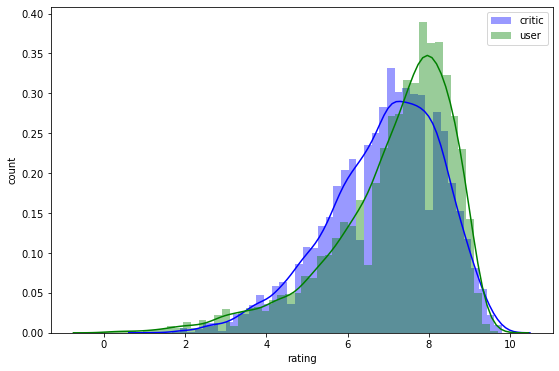

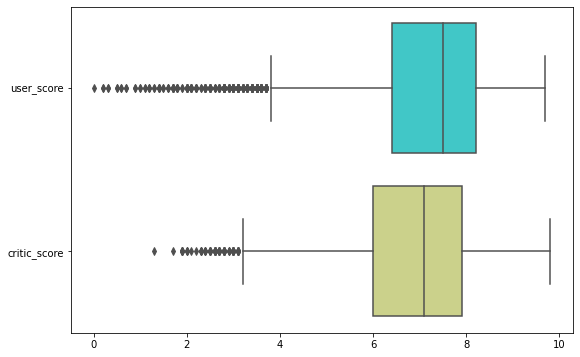

In [24]:
#построим распределение оценок по обоим рейтингам
plt.figure(figsize=(9,6))
sns.distplot(df['critic_score'],color='blue',label='critic')
sns.distplot(df['user_score'],color='green',label='user')
plt.xlabel('rating')
plt.ylabel('count')
plt.legend() 
plt.figure(figsize=(9,6))
sns.boxplot(order=["user_score", "critic_score"], data=df, palette='rainbow', orient="h")

In [25]:
df.loc[:,['user_score','critic_score']].describe()

,user_score,critic_score
count,7590.000000,8137.000000
mean,7.125046,6.896768
std,1.500006,1.393816
min,0.000000,1.300000
25%,6.400000,6.000000
50%,7.500000,7.100000
75%,8.200000,7.900000
max,9.700000,9.800000


Определено рейтинги имеют корреляцию. Оба скошены влево, медианы больше среднего значения. 
Можно было бы поискать повышающие точность признаки и произвести замену пропусков. 
Посмотрим на сколько это улучшит общую картину данных

In [26]:
#посчитаем сколько значений имет одновременный пропуск в обоих рейтингах
df[df['critic_score'].isnull()&df['user_score'].isnull()].shape

(8005, 11)

In [27]:
#сколько значений имеют пропуск в одном из рейтингов
df[(df['critic_score'].isnull())^(df['user_score'].isnull())].shape

(1693, 11)

Таким образом мы можем увеличить только на 10 % количество данных, при этом потеряем в точности.
Оставляем пропуски  без  замены. 

### Шаг 3. Исследовательский анализ данных

### 3.1 Индустрия компьютерных игр. Как менялись продажи по годам.

In [28]:
#Добавим в датафрейм колонку с сумарными продажами 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [29]:
#Посмотрим сколько в год выпускается новых игр (релизов)
new_name_count = df.groupby('year_of_release')['name'].count()

In [30]:
new_name_count.describe()

count      37.000000
mean      447.810811
std       455.786368
min         9.000000
25%        36.000000
50%       340.000000
75%       765.000000
max      1441.000000
Name: name, dtype: float64

Всего игровой индустрии, судя по имеющимся данным, 37 лет. В среднем в год выходит 447 игр, медианной значение 340.
Самый урожайный год принес 1441 релиз. 

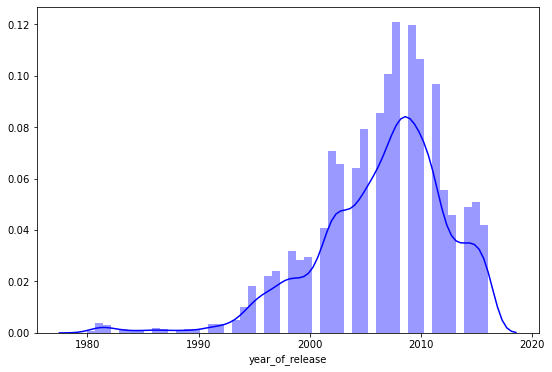

In [31]:
#посмотрим как менялось количество выпущенных игр по годам:
plt.figure(figsize=(9,6))
sns.distplot(df['year_of_release'],color='blue', label = 'name', bins=50)

Неожиданый график. Видно что количество  игр  на рынке снижается, при этом  количество геймеров интуитивно 
должно расти. Видимо какие-то игры завоевывают широкую популярность. 

Посмотрим как меняются продажи по годам

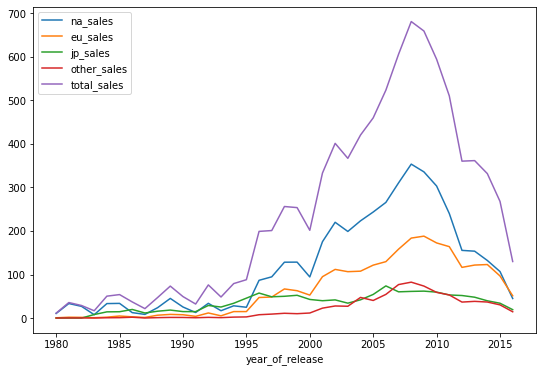

In [32]:
df['total_sales'] = df['eu_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales']
sales  = df[[x for x in df.columns if 'sales' in x] + ['year_of_release']]
sales.groupby('year_of_release').sum().plot(figsize=(9,6))

По графику видно что есть пик в 2008 - 2009 годах. Далее выручка снижается. Прежде чем делать вывод о снижении рынка. 
Сделаем две оговорки - данные указывают .что снижается продажи в год релиза. Возможно игры продаются не только первый год,
но два, три или более. Так же в данных нет мобильных платформ (планшеты и смартфоны),  которые набрали в последнии годы мощь и графику  и в целом стали угрожать приставкам и компьютерным играм. 
Видимо разитие идет так быстро , что жизнь игровой платформы скоротечна. 

Посмотрим как долго живет платформа. Конечно приставка может валятся дома десятилетиями, но мы будем считать  периодом жизни платформы отрезок времени между  первым и последним годом выхода новой игры.  

In [33]:
#соберем датасет platform_life с данными о периоде жизни каждой платформы и ее продажам 
#Будем считать что период жизни платформы ограничен первым и последним годом выхода новой игры. 
platform_life = df.groupby('platform').agg({'year_of_release':('min'),'name':('count')})
platform_life['last_year'] = df.groupby('platform').agg({'year_of_release':('max')})
platform_life['period'] = platform_life['last_year'] - platform_life['year_of_release']+1
platform_life['eu_sales'] = df.groupby('platform').agg({'eu_sales':'sum'})
platform_life['jp_sales'] = df.groupby('platform').agg({'jp_sales':'sum'})
platform_life['other_sales'] = df.groupby('platform').agg({'other_sales':'sum'})
platform_life['total_sales']  = platform_life['eu_sales']+platform_life['jp_sales']+platform_life['other_sales']
platform_life.columns = ['first_year','number_game','last_year','period','eu_sales','jp_sales','other_sales','total_sales']

In [34]:
platform_life

,first_year,number_game,last_year,period,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,,,,
2600,1980.0,133,1999.0,20.0,5.47,0.00,0.91,6.38
3DO,1994.0,3,1995.0,2.0,0.00,0.10,0.00,0.10
3DS,2000.0,520,2016.0,17.0,61.48,100.67,13.36,175.51
DC,1998.0,52,2008.0,11.0,1.69,8.56,0.27,10.52
DS,1985.0,2151,2013.0,29.0,188.89,175.57,59.26,423.72
GB,1988.0,98,2001.0,14.0,47.82,85.12,8.20,141.14
GBA,2000.0,822,2007.0,8.0,75.25,47.33,7.73,130.31
GC,2001.0,556,2007.0,7.0,38.71,21.58,5.18,65.47
GEN,1990.0,29,1994.0,5.0,6.05,2.70,0.97,9.72


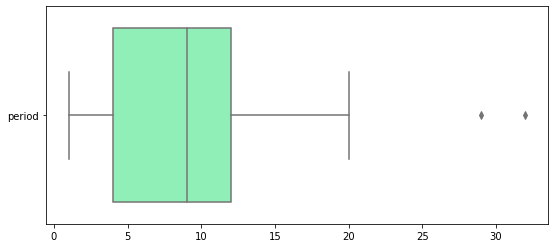

In [35]:
#построим диаграмму размаха по периоду
plt.figure(figsize=(9,4))
sns.boxplot(order=["period"], data=platform_life, palette='rainbow', orient="h")

In [36]:
platform_life.loc[:,['period']].describe()

,period
count,31.000000
mean,9.387097
std,7.405752
min,1.000000
25%,4.000000
50%,9.000000
75%,12.000000
max,32.000000


In [37]:
platform_life2=platform_life.query('first_year > 2000')
platform_life2.loc[:,['period']].describe()

,period
count,9.000000
mean,8.111111
std,3.586239
min,4.000000
25%,5.000000
50%,7.000000
75%,12.000000
max,12.000000


Заметно что век платформы стал еще более коротким, медианное значение - 7 лет. 

Посмотрим как распределилась выручка индустрии по платформам

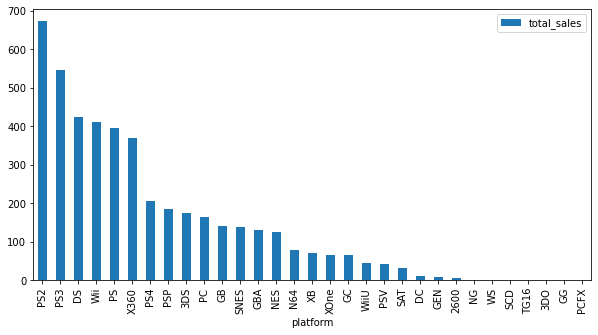

In [38]:
platform_life.sort_values(by = 'total_sales', ascending=False, inplace = True)
platform_life.plot(kind='bar', y=[('total_sales')],figsize=(10,5)) 

Топ-5 самых "оборотистых платформ"

In [39]:
platform_life.head(5)

,first_year,number_game,last_year,period,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,,,,
PS2,2000.0,2161,2011.0,12.0,339.29,139.20,193.44,671.93
PS3,2005.0,1331,2016.0,12.0,330.29,80.19,135.68,546.16
DS,1985.0,2151,2013.0,29.0,188.89,175.57,59.26,423.72
Wii,2006.0,1320,2016.0,11.0,262.21,69.33,79.07,410.61
PS,1994.0,1197,2003.0,10.0,213.61,139.82,40.91,394.34


Посмотрим продажи по годам самых прибыльных платформ


In [40]:
top5 = platform_life.head(5).index
top5

Index(['PS2', 'PS3', 'DS', 'Wii', 'PS'], dtype='object', name='platform')

In [41]:
platform_sales = df.groupby(['platform','year_of_release'])['total_sales'].sum()
platform_sales = pd.DataFrame(platform_sales).reset_index()

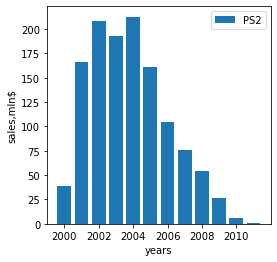

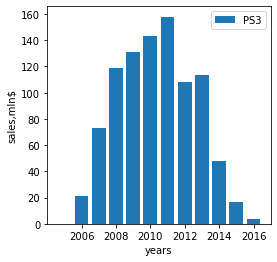

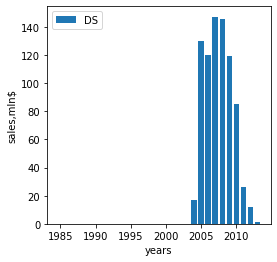

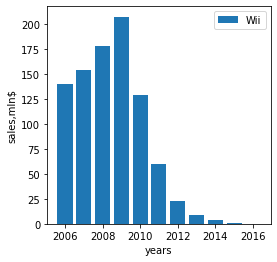

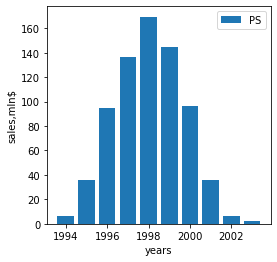

In [42]:
for top in top5:
    tmp = platform_sales[platform_sales["platform"] == top]
    plt.figure(figsize=(4,4))
    plt.xlabel('period')
    plt.bar(tmp['year_of_release'],tmp['total_sales'],label=top)
    plt.xlabel('years')
    plt.ylabel('sales,mln$')
    plt.legend() 

Жизнь платформы длится около 7 лет, но эти 7 лет разные. Первую половину плафторма растет, вторую падает. 
Причем рост очень крутой.Большая часть игр выходит в первой половине. 
Это видно по распределению Wii,PS2,PS3 - они скошено влево. Если мы хотим сделать рекламу своего магазина,
то мы должны ставить на растущие платформы. А это 3-3,5 года. Таким образом нам нужен период -последние три года и неполный 2016 год. 

Какие платформы лидируют по продажам, растут или падают в актуальном периоде? 

In [43]:
current_sales = df.query('year_of_release >= 2013')#сделаем срез по актуальному периоду

In [44]:
#сведем таблицу по платформам и году
current_platform = current_sales.pivot_table(index=['platform'], columns='year_of_release',
                                             values='total_sales', aggfunc='sum').reset_index()
current_platform.columns=['platform','2013','2014','2015','2016']
current_platform = current_platform.sort_values(by='2013',ascending = False)
current_platform

,platform,2013,2014,2015,2016
3,PS3,113.25,47.76,16.82,3.60
9,X360,88.58,34.74,11.96,1.52
0,3DS,56.57,43.76,27.78,15.14
4,PS4,25.99,100.00,118.90,69.25
8,WiiU,21.65,22.03,16.35,4.60
10,XOne,18.96,54.07,60.14,26.15
2,PC,12.66,13.63,8.52,5.25
6,PSV,10.59,11.90,6.25,4.25
7,Wii,8.59,3.75,1.14,0.18
5,PSP,3.38,0.24,0.12,NaN


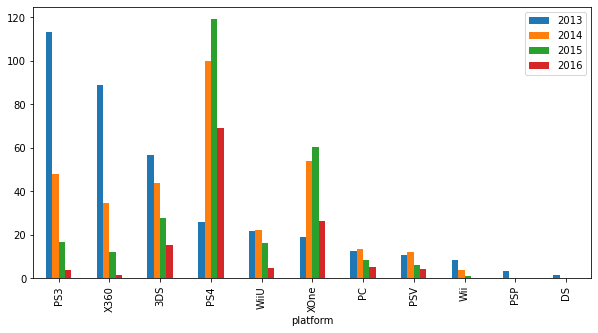

In [45]:
current_platform.plot(x=('platform'),kind='bar', figsize=(10,5)) 

Потенциально прибыльные платформы PS4,  XOne. Остальные показывают снижение от года к году 

Сколько в среднем приносит игра на каждой из платформ ?


In [46]:
top = current_platform['platform'].values.tolist() #список из актуальных платформ
top

['PS3', 'X360', '3DS', 'PS4', 'WiiU', 'XOne', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

(0.0, 2.0)

<Figure size 288x720 with 0 Axes>

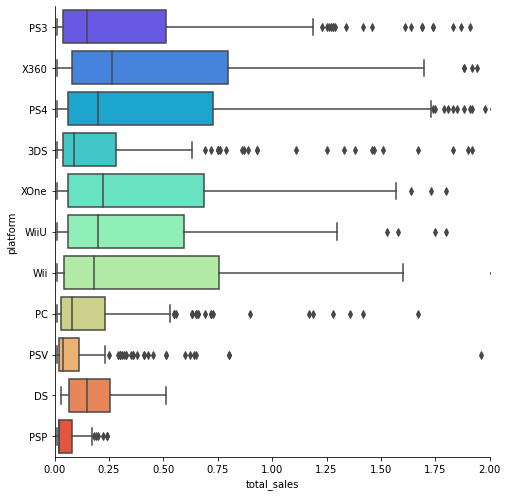

In [47]:
plt.figure(figsize=(4,10))
sns.catplot(x="total_sales",y='platform', data=current_sales, kind='box',height=7, palette='rainbow', orient="h")
plt.xlim(0,2)

In [48]:
mean_sales = current_sales.groupby('platform').agg({'total_sales':['median','mean','sum'],'name':'count'}).reset_index()
mean_sales.columns=['platform','median','mean','total_sales','count']
mean_sales.sort_values(by ='total_sales', ascending=False, inplace = True)
mean_sales

,platform,median,mean,total_sales,count
4,PS4,0.200,0.801378,314.14,392
3,PS3,0.150,0.525884,181.43,345
10,XOne,0.220,0.645020,159.32,247
0,3DS,0.090,0.472772,143.25,303
9,X360,0.265,0.735484,136.80,186
8,WiiU,0.200,0.562000,64.63,115
2,PC,0.080,0.208646,40.06,192
6,PSV,0.040,0.092151,32.99,358
7,Wii,0.180,0.593913,13.66,23
5,PSP,0.020,0.055000,3.74,68


Валовая выручка от платформы к платформе отличается  на порядки . 
Средняя выручка за продажу одной игры  отличается 2-3 раза. Это говорит о том, что популярная
платформа перетягивает на себя новые игры. 

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 


In [49]:
#Сделаем срез по датафрейму , оставим продажи где имеются данные рейтингов
critic_rating = current_sales[current_sales['critic_score'].isnull()==False] 
user_rating =  current_sales[current_sales['user_score'].isnull()==False]

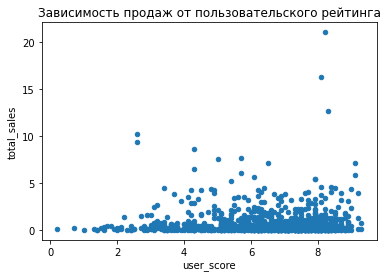

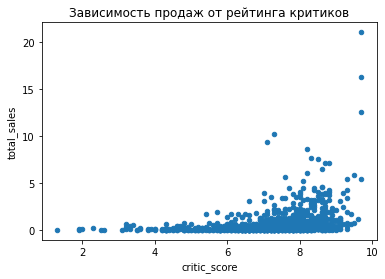

In [50]:
#построим диаграммы рассеивания
user_rating.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж от пользовательского рейтинга')
critic_rating.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж от рейтинга критиков')
plt.show()

In [51]:
#Посчитаем коэффициенты корреляции Пирсона;
print('Коэф-нт корреляции рейтинга пользователей: {:.2f}'.format(user_rating['user_score'].corr(user_rating['total_sales']))) 
print('Коэф-нт корреляции рейтинга критиков: {:.2f}'.format(critic_rating['critic_score'].corr(critic_rating['total_sales'])))

Коэф-нт корреляции рейтинга пользователей: -0.00
Коэф-нт корреляции рейтинга критиков: 0.31


Связь продаж с оценкой критикой определенно имеется , но это нечеткая зависимость. 
Связь же с рейтингом пользователей отсутсвует.
Так что влияет на продажи , если качество игры не имеет сильного влияния? 
Посмотрим дальше. 

In [52]:
Может быть жанры? Посмотрим на прибыльность жанров

SyntaxError: invalid syntax (<ipython-input-52-1d447c386f6b>, line 1)

In [ ]:

genre_sales = current_sales.groupby('genre').agg({'total_sales':('sum'),'name':'count'}).reset_index()
genre_sales.sort_values(by ='total_sales', ascending=False, inplace = True)

In [ ]:
genre_sales

In [ ]:
genre_sales.plot(x=('genre'),kind='bar', figsize=(10,5))
plt.title('Рейтинг жанров')
plt.show()

Есть жанры популярные и менее популярные. Самый востребованный "Action", за ним следуют "Shooter", 3 и 4 место делят 
"Role-Playing" и "Sports". 
Определенно жанр игры влияет на выручку. Впереди  по продажам ресурсоемкие жанры. Пазлы в конце списка. 

Как влияют на продажи региональные особенности потребителя? 
Составим портрет каждого региона

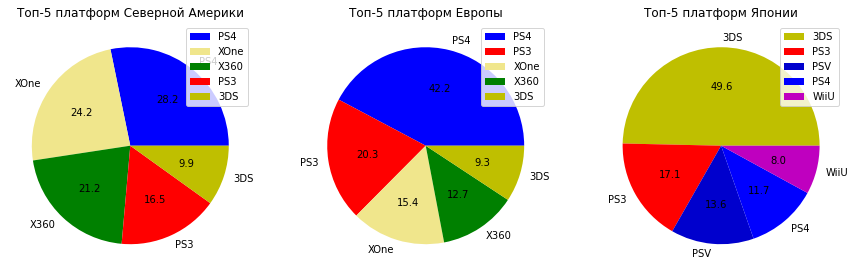

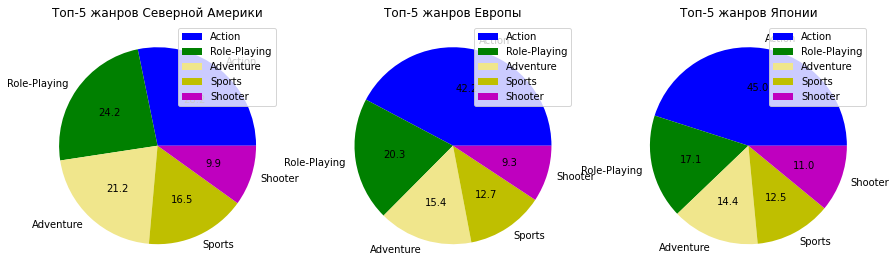

In [62]:
#зададим словарь цветов  для каждой платформы
platforms_colors= {'PS4':'b', 'X360':'g', 'XOne':'khaki', 'PS3':'r', '3DS':'y', 'WiiU':'m', 'PC':'mediumpurple', 
              'Wii':'darkseagreen', 'PSV':'mediumblue', 'DS':'orchid', 'PSP':'auqamarine'}

#зададим словарь цветом для каждого жанра
genre_color= {'Action':'b', 'Role-Playing':'g', 'Adventure':'khaki', 'Sports':'y', 'Shooter':'m', 'Misc':'mediumpurple',
       'Fighting':'darkseagreen', 'Racing':'mediumblue', 'Platform':'orchid', 'Simulation':'auqamarine', 
              'Strategy':'sienna', 'Puzzle':'coral'}

#cгруппируем продажи по платформам для Японии, выделем топ-5
jp_sales = current_sales.pivot_table(index=['platform'], values='jp_sales',
                                    aggfunc='sum',).sort_values(by = "jp_sales", ascending = False).head(5)
#cгруппируем продажи по жанрам для Японии, выделем топ-5
jp_genre = current_sales.pivot_table(index=['genre'], values='jp_sales',
                                     aggfunc='count',).sort_values(by = "jp_sales", ascending = False).head(5)
#список топ-5 платформ для Японии
jp_label = jp_sales.index
jp_color = [platforms_colors[key] for key in jp_sales.index]

#список топ-5 жанров для Японии
jp_label_genre = jp_genre.index
jp_color_genre = [genre_color[key] for key in jp_genre.index]

#-------------------------Проделаем то же самое для Европы-------------------------------------------------

eu_sales = current_sales.pivot_table(index=['platform'], values='eu_sales',
                                    aggfunc='sum').sort_values(by = "eu_sales", ascending = False).head(5)
eu_genre = current_sales.pivot_table(index=['genre'], values='eu_sales',
                                    aggfunc='count',).sort_values(by = "eu_sales", ascending = False).head(5)
eu_label = eu_sales.index
eu_color = [platforms_colors[key] for key in eu_sales.index]

eu_label_genre = eu_genre.index
eu_color_genre = [genre_color[key] for key in eu_genre.index]

#--------------------------Проделаем то же самое для Америки----------------------------------------------

na_sales = current_sales.pivot_table(index=['platform'], values='na_sales',
                                    aggfunc='sum').sort_values(by = "na_sales", ascending = False).head(5)
na_genre = current_sales.pivot_table(index=['genre'], values='na_sales',
                                    aggfunc='count',).sort_values(by = "na_sales", ascending = False).head(5)
na_label = na_sales.index
na_color = [platforms_colors[key] for key in na_sales.index]

na_label_genre = na_genre.index
na_color_genre = [genre_color[key] for key in na_genre.index]

#------------------------Рисуем три граффика для платформ---------------------------------------------------
fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].pie(na_sales['na_sales'], autopct='%.1f', labels = na_label, colors = na_color )
axs[0].set_title('Топ-5 платформ Северной Америки') 
axs[0].legend()
axs[1].pie(eu_sales['eu_sales'], autopct='%.1f',labels = eu_label, colors = eu_color)
axs[1].set_title('Топ-5 платформ Европы')
axs[1].legend()
axs[2].pie(jp_sales['jp_sales'], autopct='%.1f', labels = jp_label, colors = jp_color)
axs[2].set_title('Топ-5 платформ Японии')
axs[2].legend()
plt.show()
#--------------------------Рисуем три граффика для жанров-------------------------------------------------
fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].pie(na_sales['na_sales'], autopct='%.1f', labels = na_label_genre, colors = na_color_genre )
axs[0].set_title('Топ-5 жанров Северной Америки') 
axs[0].legend()
axs[1].pie(eu_sales['eu_sales'], autopct='%.1f',labels = eu_label_genre, colors = eu_color_genre)
axs[1].set_title('Топ-5 жанров Европы')
axs[1].legend()
axs[2].pie(jp_genre['jp_sales'], autopct='%.1f',labels = jp_label_genre, colors = jp_color_genre)
axs[2].set_title('Топ-5 жанров Японии')
axs[2].legend()
plt.show()

Лидеры продаж от региона к региону отличаются

Американская пятерка: PS4, XOne, X360,PS3,3DS - в топе 2 американские приставки. Местные производители имеют свое лобби. 

Европейская пятерка: PS4, PS3, XOne,X360,3DS - американские приставки на вторых ролях. 

Японская пятерка: 3DS,PS3,PSV,PS4,WiiU - здесь рулят местные.       

Жанры - интернациональны. Списки лидеров с небольшим колебанием повторяются. 

Влияние рейтинга ESRB

In [59]:
#сведем таблицу по жанрам и значениям рейтинга
rating_esrb = current_sales.pivot_table(index = ['rating'], columns = (['jp_sales','eu_sales','na_sales']), values ='name', aggfunc ='count')
#заменим пропуски нулями
rating_esrb.fillna(0)
rating_esrb2 = df.groupby(['rating']).agg({'jp_sales':('sum'),'na_sales':('sum'),'eu_sales':('sum')})

rating_esrb2

,jp_sales,na_sales,eu_sales
rating,,,
AO,0.00,1.26,0.61
E,198.11,1292.99,710.25
E10+,40.20,353.32,188.52
EC,0.00,1.53,0.11
K-A,1.46,2.56,0.27
M,64.24,748.48,483.97
RP,0.00,0.00,0.08
T,151.40,759.75,427.03


In [60]:
#удалим рейтинги, у которых продажи менее 1% от общего числа продаж  - это АО, ЕС, К-А,RP
rating_esrb2.drop(rating_esrb2.index[[0,3,4,6]], inplace = True)

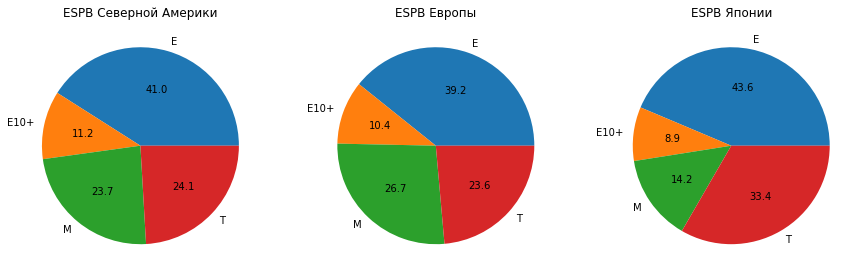

In [61]:
fig, axs = plt.subplots(1,3, figsize = (15,15))
axs[0].pie(rating_esrb2['na_sales'], autopct='%.1f', labels=rating_esrb2.index)
axs[0].set_title('ESPB Северной Америки') 
axs[1].pie(rating_esrb2['eu_sales'], autopct='%.1f', labels=rating_esrb2.index)
axs[1].set_title('ESPB Европы') 
axs[2].pie(rating_esrb2['jp_sales'], autopct='%.1f', labels=rating_esrb2.index)
axs[2].set_title('ESPB Японии') 
plt.show()

Рейтинги очень схожи, за одним исключением.
в Японии  игры  с рейтингом Т(для подростков) отъели половину доли у игр с рейтингом М (для взрослых). 

### Шаг 5. Проверьте гипотезы

Гипотеза 1.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотеза 2.
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и
Sports (англ. «спортивные соревнования») разные.


In [74]:
current_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   float64
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    float64
 9   user_score       1195 non-null   float64
 10  rating           1259 non-null   object 
 11  total_sales      2237 non-null   float64
dtypes: float64(8), object(4)
memory usage: 256.2+ KB


In [71]:
#сделаем  срезы  и почистим от NaN
user_score = current_sales.dropna(subset=['user_score'])   
Xbox_One = user_score.query('platform == "XOne"')
PC = user_score.query('platform == "PC"')
Action = user_score.query('genre == "Action"')
Sports =  user_score.query('genre == "Sports"')

In [72]:
#Гипотеза1:
#Cформулируем нулевую гипотезу H0 следующим образом:
#средний рейтинг user_score на платформах Xbox One и PC одинаков.
#Тогда альтернативная гипотеза 
#средний рейтинг user_score на платформах Xbox One разный

alpha = .05 # возьмем общепринятый уровень статистической значимости. 

results = st.ttest_ind(
    Xbox_One['user_score'], 
    PC['user_score'])
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


In [75]:
#Гипотеза 2:
#сформулируем нулевую гипотезу: средние рейтинги жанров Action и Sports равны
#Тогда альтернативная гипотеза 
#средний пользовательский рейтинг  жанров Action и Sports разный

alpha = .05 # возьмем общепринятый уровень статистической значимости. 


results = st.ttest_ind(
    Action['user_score'], 
    Sports['user_score'])
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.11729623919141e-28
Отвергаем нулевую гипотезу


### Шаг 6.  Общий вывод


Рынок компьютерных игр очень динамичен. Заметно сильное падение рынка с 2010 года , 
скорее всего происходит большое перемещение игр в сегмент планшетов и смартфонов,
которые  не учтены  в данных.

Наиболее популярные жанры - это ресурсоемкие жанры,  требующие большей производительности и мощности платформы.

Чтобы победить  в конкуренции , производители наращивают мощность платформы. Победитель в этой гонке получает все.

Как только выходит новая  более мощная платформа, она забирает на себя продажи игр. 

Наиболее целесообразно отобрать для рекламы  игры рассчитанные на новые платформы.

Существует региональные отличия, так в Японии и Америке более популярны местные производители.При рекламной компании нужно делать акцент на региональные особенности.